## Linear Regression Assignment

Build the linear regression model using scikit learn in boston data to predict 'price' based on other dependent variable.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set()
%matplotlib inline

In [2]:
# loading the dataset

import sklearn 
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [6]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
# creating dataframe of data

bos = pd.DataFrame(boston.data, columns = boston.feature_names)

In [9]:
# looking at first five rows of data
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# looking at last five rows of data

bos.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [11]:
bos.shape

(506, 13)

In [12]:
# adding target variable to the data

bos['target'] = boston.target

In [13]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**There are no null values in the data**

In [15]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [16]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


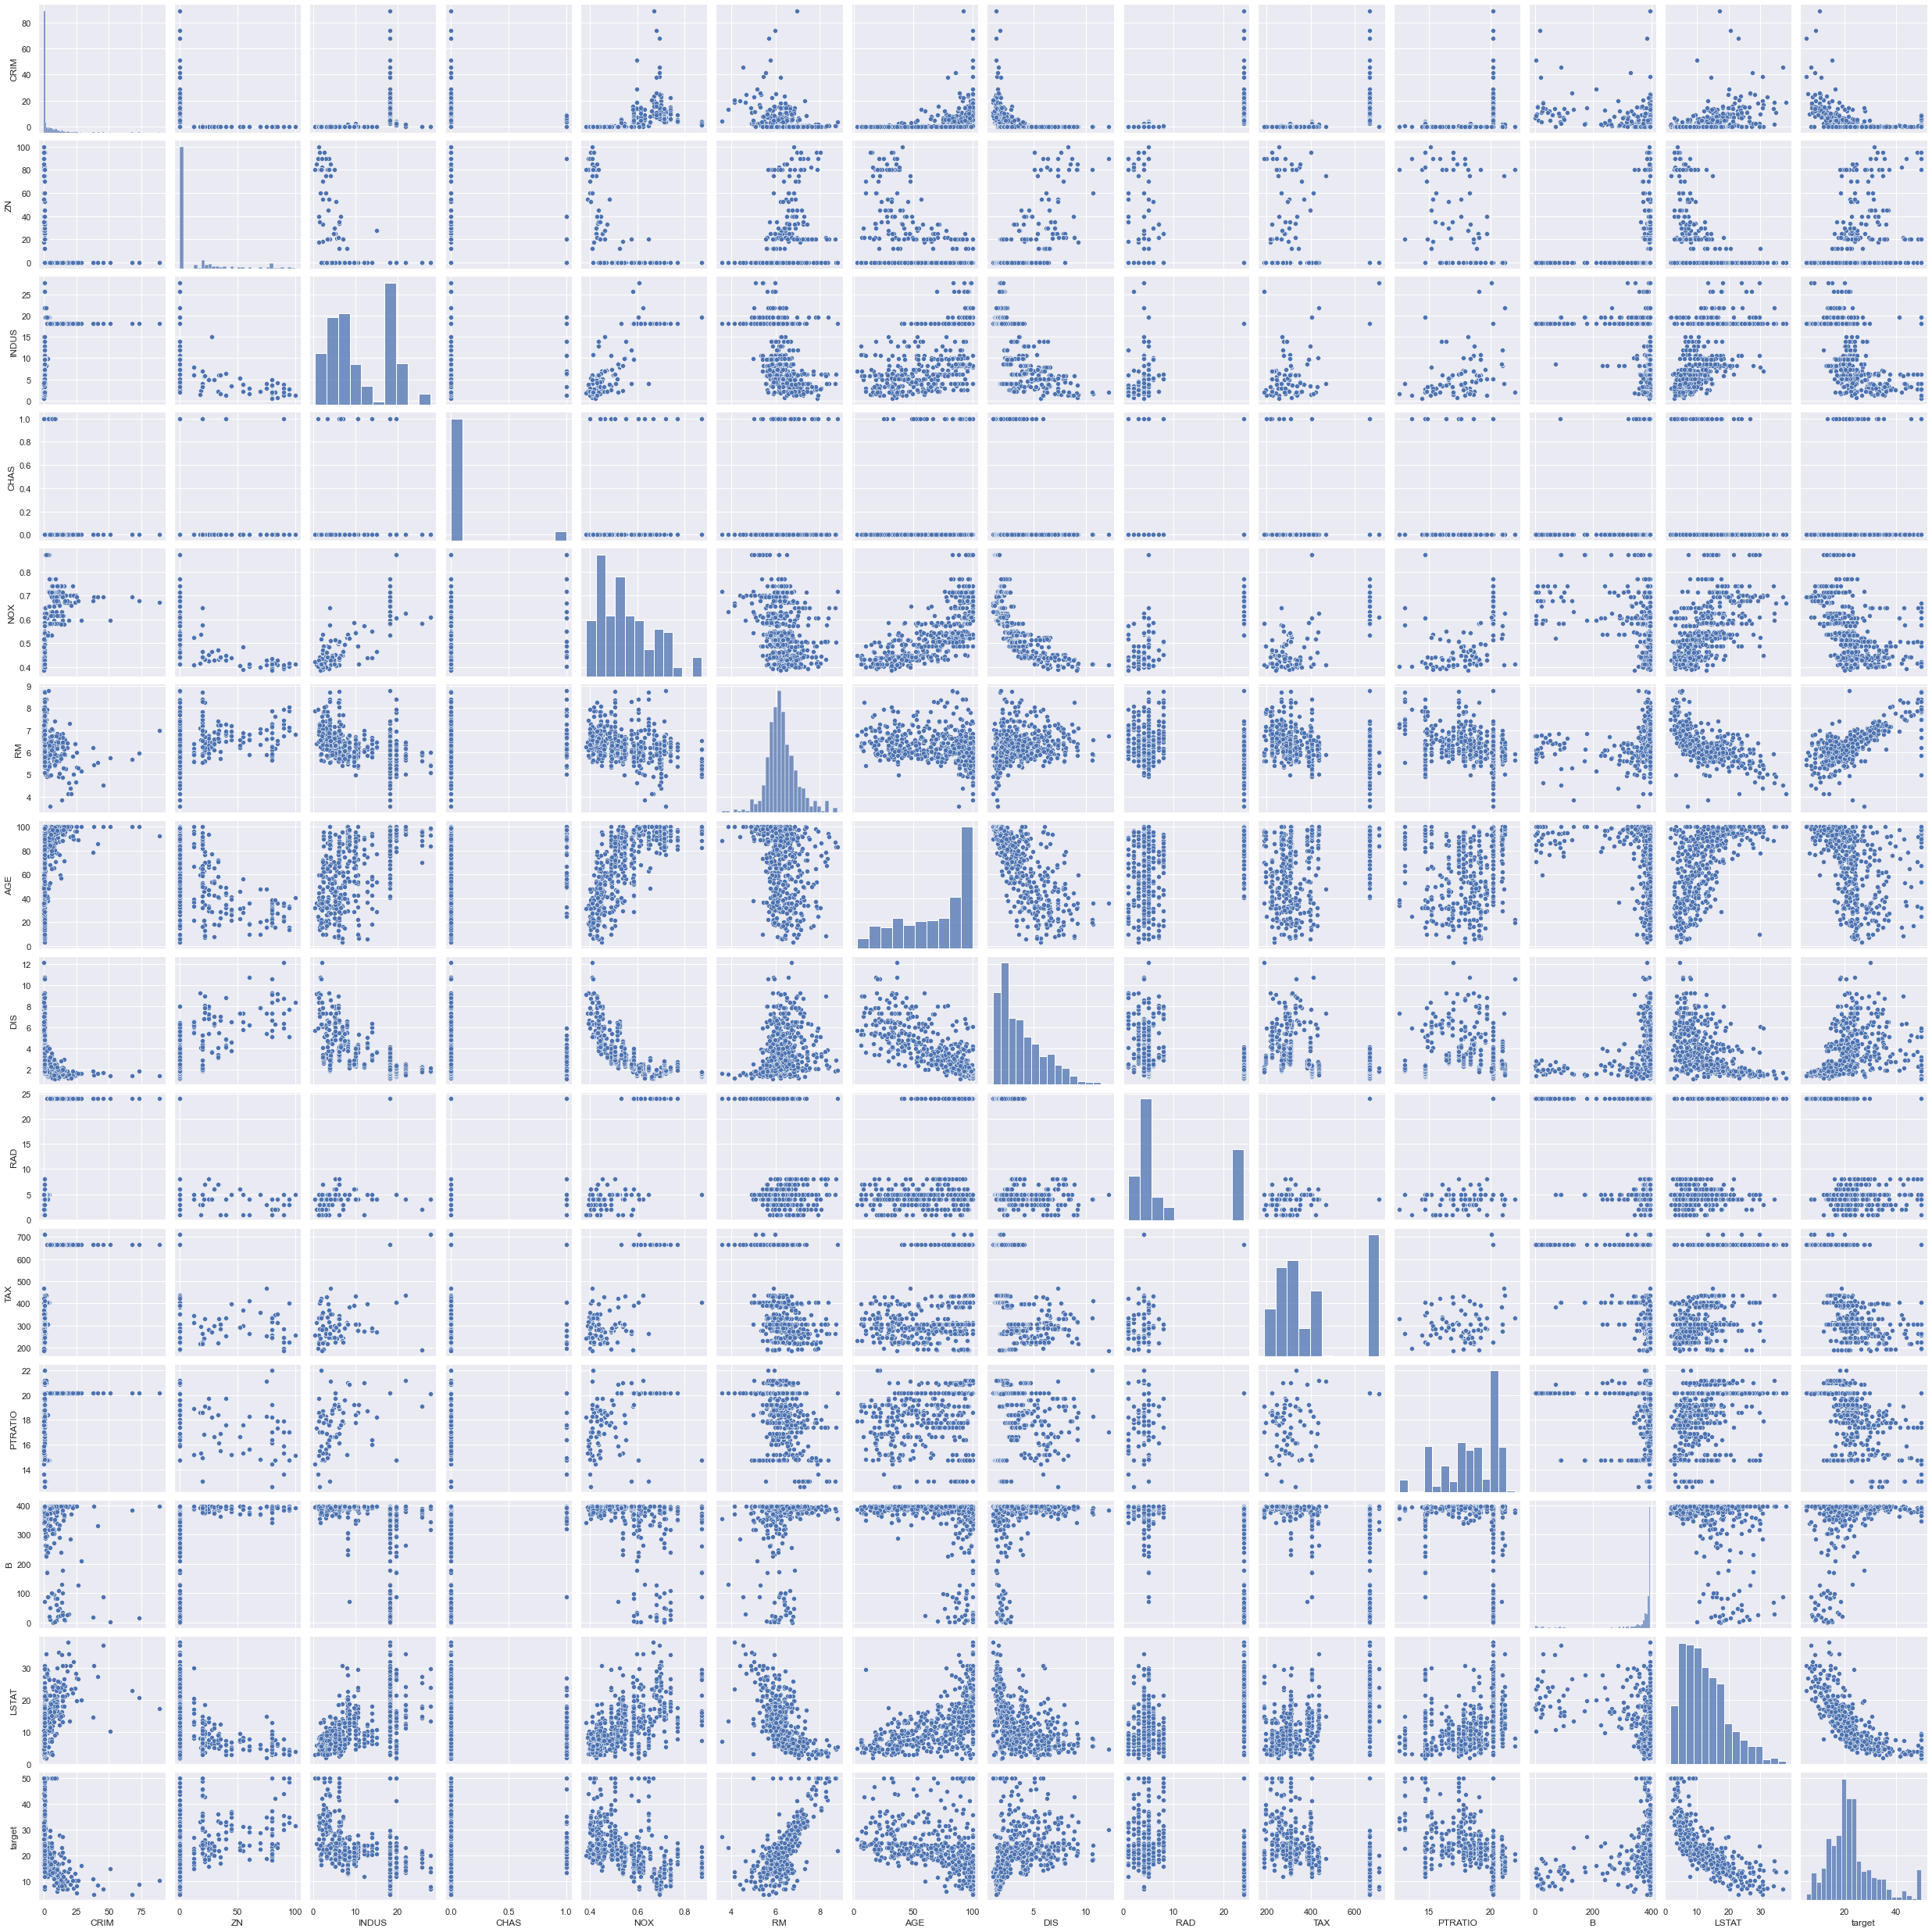

In [17]:
sns.pairplot(bos)
plt.show()

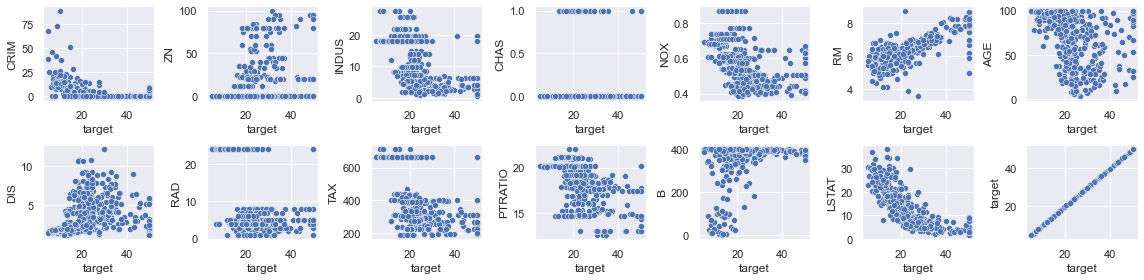

In [18]:
# plotting price with remaining columns

fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize = (16, 4))

col = bos.columns
index = 0

for i in range(2):
    for j in range(7):
        sns.scatterplot(x = 'target', y = col[index], ax = ax[i][j], data = bos)
        index += 1
        
plt.tight_layout()
plt.show()

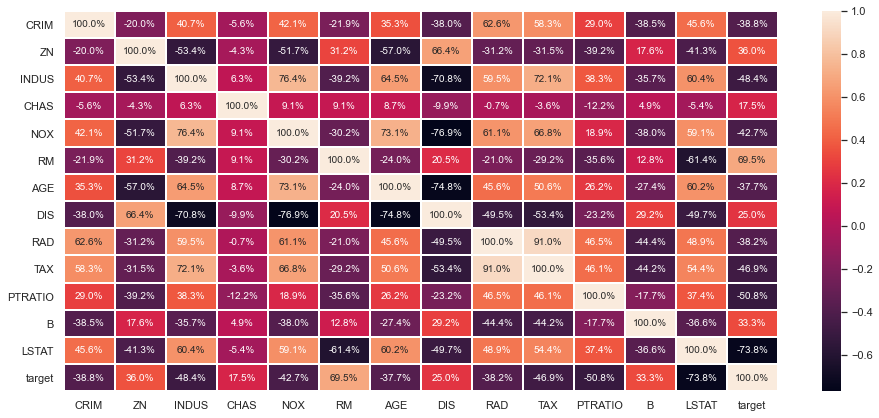

In [19]:
plt.figure(figsize = (16, 7))
sns.heatmap(bos.corr(), annot = True, linewidths = 1, fmt = '2.1%')

plt.show()

`TAX` and `RAD` columns have high multicollinearity so we will drop them.

### Feature selection

In [20]:
# ols for all features
import statsmodels.formula.api as smf

l = smf.ols(formula = 'target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + PTRATIO + B + LSTAT', data = bos).fit()
l.conf_int()
l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     121.0
Date:                Wed, 03 Feb 2021   Prob (F-statistic):          2.00e-132
Time:                        01:12:52   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     494   BIC:                             3094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.2107      4.893      5.970      0.000      19.597      38.825
CRIM          -0.0614      0.030     -2.019      0.044      -0.121      -0.002
ZN             0.0415      0.014      3.064      0.002       0.015       0.068
INDUS         -0.0458      0.056     -0.819      0.413      -0.156       0.064
CHAS           3.0850      0.872      3.538      0.000       1.372       4.798
NOX          -14.5948      3.670     -3.977      0.000     -21.806      -7.384
RM             4.1343      0.419      9.859      0.000       3.310       4.958
AGE           -0.0043      0.013     -0.320      0.749      -0.031       0.022
DIS           -1.4889      0.203     -7.322      0.000      -1.888      -1.089
PTRATIO       -0.8113      0.122     -6.669      0.000      -1.050      -0.572
B              0.0082      0.003      3.032      0.003       0.003       0.014
LSTAT         -0.5158      0.052     -9.983      0.000      -0.617      -0.414
==============================================================================
Omnibus:                      193.860   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.429
Skew:                           1.628   Prob(JB):                    7.58e-209
Kurtosis:                       8.904   Cond. No.                     9.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# correlated feature selection

def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if (abs(corrdata[index])) > threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df

In [22]:
corr = bos.corr()
threshold = 0.5
corr_df = getCorrelatedFeature(corr.target, threshold)

In [23]:
corr_df

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
target,1.000000


In [24]:
# ols for correlated features
l = smf.ols(formula = 'target ~ RM + PTRATIO + LSTAT', data = bos).fit()
l.conf_int()
l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Wed, 03 Feb 2021   Prob (F-statistic):          2.69e-123
Time:                        01:12:52   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.000      10.879      26.255
RM             4.5154      0.426     10.603      0.000       3.679       5.352
PTRATIO       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
LSTAT         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Creating X and y

X = bos.iloc[:, :-1].values
y = bos.iloc[:, -1].values

In [26]:
X[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [27]:
y[:2]

array([24. , 21.6])

In [28]:
X.shape, y.shape

((506, 13), (506,))

In [29]:
# splitting data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
X_train[:2]

array([[1.9133e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01,
        5.6050e+00, 7.0200e+01, 7.9549e+00, 7.0000e+00, 3.3000e+02,
        1.9100e+01, 3.8913e+02, 1.8460e+01],
       [1.0328e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01,
        5.9270e+00, 4.7200e+01, 6.9320e+00, 8.0000e+00, 2.8400e+02,
        1.9700e+01, 3.9690e+02, 9.2200e+00]])

In [31]:
y_train[:2]

array([18.5, 19.6])

In [32]:
X_test[:2]

array([[6.7240e-02, 0.0000e+00, 3.2400e+00, 0.0000e+00, 4.6000e-01,
        6.3330e+00, 1.7200e+01, 5.2146e+00, 4.0000e+00, 4.3000e+02,
        1.6900e+01, 3.7521e+02, 7.3400e+00],
       [9.2323e+00, 0.0000e+00, 1.8100e+01, 0.0000e+00, 6.3100e-01,
        6.2160e+00, 1.0000e+02, 1.1691e+00, 2.4000e+01, 6.6600e+02,
        2.0200e+01, 3.6615e+02, 9.5300e+00]])

In [33]:
y_test[:2]

array([22.6, 50. ])

In [34]:
X_train.shape, y_train.shape

((379, 13), (379,))

In [35]:
X_test.shape, y_test.shape

((127, 13), (127,))

In [36]:
# fitting data to model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = lin_reg.predict(X_test)

In [38]:
y_pred[:10]

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ])

In [39]:
# comparing predicted values with actual values

comp = pd.DataFrame({'Actual Values': y_test, 'Predicted Valyues': y_pred.round(2)})

In [40]:
comp

,Actual Values,Predicted Valyues
0,22.6,24.95
1,50.0,23.62
2,23.0,29.21
3,8.3,11.96
4,21.2,21.33
...,...,...
122,19.4,17.54
123,21.2,21.50
124,20.3,23.63
125,18.8,20.28


In [41]:
from sklearn.metrics import r2_score

def adj_r2(X, y):
    r2 = lin_reg.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2)*(n - 1)/(n - p - 1)
    
    return adjusted_r2

In [42]:
lin_reg.score(X_train, y_train)

0.7697699488741149

In [43]:
adj_r2(X_train, y_train)

0.7615699744504532

In [44]:
lin_reg.score(X_test, y_test)

0.6354638433202122

In [45]:
adj_r2(X_test, y_test)

0.5935260553835995

In [46]:
# Lasso Regularization

from sklearn.linear_model import  Lasso, LassoCV, Ridge, RidgeCV
lasscv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [47]:
# best alpha perimeter
alpha = lasscv.alpha_
alpha

0.0003845586184175237

In [48]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0003845586184175237)

In [49]:
lasso_reg.score(X_test, y_test)

0.6353391905805896

In [50]:
alphas = np.random.uniform(low = 0, high = 10, size = (50,))
ridgecv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.86191194, 9.51535155, 8.33860394, 8.41276854, 0.30427528,
       2.60087901, 5.66917995, 6.24877032, 3.74040443, 2.05008847,
       3.35752987, 3.19993528, 3.89809334, 7.69986609, 7.89144095,
       7.35189948, 2.42452526, 8.19683514, 7.19705363, 8.96282177,
       6.9158754 , 1.23326894, 3.78501074, 4.8795178 , 2.45564224,
       3.24133977, 7.37053848, 8.72098324, 2.55476584, 7.77066062,
       7.38931048, 9.75785219, 6.03996785, 7.65879875, 9.49011446,
       1.49577181, 2.37059194, 5.02369077, 8.81847325, 0.63202224,
       1.29416549, 2.14232853, 2.26902006, 0.12683405, 5.05108805,
       6.6973619 , 5.54555314, 9.92547728, 0.7876629 , 7.21738654]),
        cv=10, normalize=True)

In [51]:
ridgecv.alpha_

0.12683404608808013

In [52]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.12683404608808013)

In [53]:
ridge_model.score(X_test, y_test)

0.6339787217026147